# * 공공자전거 이용자와 코로나 확진자와의 관계성
# * 공공자전거 이용자와 국내유가의 관계성

In [8]:
# 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date
import warnings
warnings.filterwarnings(action='ignore')

# Matplotlib 한글 Font 설정 ---------------
from matplotlib import font_manager as fm, rc
font_path='./Fonts/malgun.ttf'
font_name=fm.FontProperties(fname=font_path).get_name()
rc('font',family=font_name)

# 파일 관련 변수
DIR='./Data/'

#### 데이터 전처리[공공자전거 이용자수 파일]

In [9]:
# 공공자전거 이용자수 파일 통합
bike1=pd.read_csv(DIR+'bikeseoul_2019.06.01_2019.11.30.csv', encoding='cp949')
bike2=pd.read_csv(DIR+'bikeseoul_2019.12.01_2020.05.31.csv', encoding='cp949')
bike3=pd.read_csv(DIR+'bikeseoul_2020.06.01_2020.06.30.csv', encoding='cp949')
bike4=pd.read_csv(DIR+'bikeseoul_2020.07.01_2021.01.31.csv', encoding='cp949')
bike5=pd.read_csv(DIR+'bikeseoul_2021.02.01_2021.06.30.csv', encoding='cp949')
bike6=pd.read_csv(DIR+'bikeseoul_2021.07.01_2021.12.31.csv', encoding='cp949')

bikeDF=pd.concat([bike1,bike2,bike3,bike4,bike5,bike6], ignore_index=True)
bikeDF.to_excel('./bike_all.xlsx')                      # 합본 파일 저장

# 컬럼명 변경
bikeDF.rename(columns={'대여일시':'date'},inplace=True)
bikeDF.rename(columns={'대여건수':'자전거대여'},inplace=True)

# 데이터 확인
# bikeDF.info()

# 자료형 object->int 변환
bikeDF['자전거대여']=bikeDF['자전거대여'].str.replace(',','').astype('int')
bikeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1092 entries, 0 to 1091
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    1092 non-null   object
 1   자전거대여   1092 non-null   int32 
dtypes: int32(1), object(1)
memory usage: 12.9+ KB


In [10]:
# 결측값 여부 확인
bikeDF.isnull().sum()

date     0
자전거대여    0
dtype: int64

In [11]:
# 중복 데이터 여부 확인
bikeDF.duplicated().sum()

148

In [12]:
# 중복 제거 함수
bikeDF=bikeDF.drop_duplicates()

# index 다시 부여
bikeDF.index=range(len(bikeDF))

# 날짜 연-월-일 분리
bike_list=bikeDF['date'].str.split('-')

bikeDF['year']=bike_list.str.get(0)
bikeDF['month']=bike_list.str.get(1)
bikeDF['day']=bike_list.str.get(2)

### (1-1) 공공자전거 대여에 대한 기본통계

In [13]:
# 공공자전거 대여건수 월별 합계 
bike_group=pd.DataFrame(bikeDF.groupby(['year','month']).sum())
bike_group

자전거대여
year month         
2019 06     2293879
     07     2164086
     08     2101184
     09     2084222
     10     2436401
     11     1537269
     12      882078
2020 01      794162
     02      762274
     03     1533535
     04     2157390
     05     2480330
     06     2770858
     07     2582511
     08     1733973
     09     2811990
     10     2891618
     11     1990070
     12     1196309
2021 01      812021
     02     1234546
     03     2184228
     04     3043238
     05     2950150
     06     3460407
     07     3377506
     08     3245974
     09     3736657
     10     3445929
     11     2737291
     12     1826746

In [14]:
a=bike_group['자전거대여']

print(f'공공자전거 대여 월평균 => {round(a.mean())}건')
print(f'공공자전거 대여 최대 이용월 => {a.idxmax()}, {a.max()}건')
print(f'공공자전거 대여 최소 이용월 => {a.idxmin()}, {a.min()}건')

공공자전거 대여 월평균 => 2234156건
공공자전거 대여 최대 이용월 => ('2021', '09'), 3736657건
공공자전거 대여 최소 이용월 => ('2020', '02'), 762274건


<AxesSubplot:xlabel='year,month'>

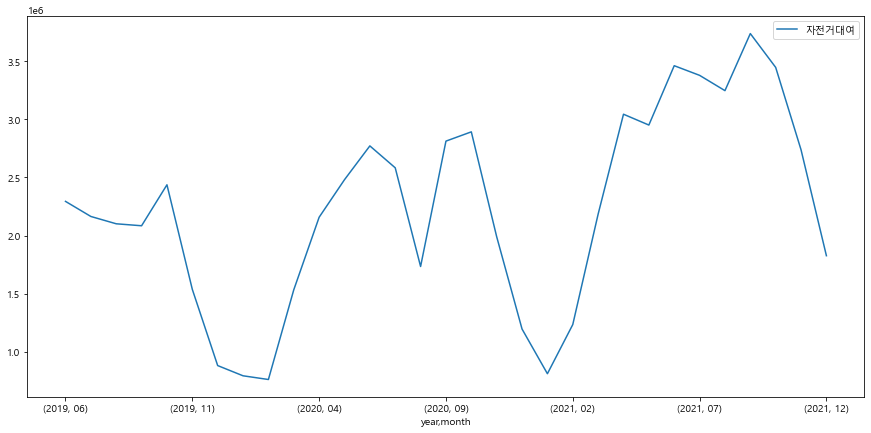

In [15]:
bike_group.plot(figsize=(15,7))

#### 데이터 전처리[코로나 확진자수 파일]

In [16]:
# 코로나 확진자수 CSV FILE => DataFrame 변환
covidDF=pd.read_csv(DIR+'COVID19_seoul_2020.0205_2022.07.11.csv', encoding='cp949')
covidDF=covidDF[covidDF.columns[:7]]

# 불필요한 열 삭제
covidDF.drop(['서울시 확진자','서울시 치료중','서울시 퇴원','서울시 추가 퇴원','서울시 사망'], axis=1, inplace=True)

# 컬럼명 변경
covidDF.rename(columns={'서울시 기준일':'date'},inplace=True)
covidDF.rename(columns={'서울시 추가 확진':'당일확진자'},inplace=True)

In [17]:
# 날짜 유형 변경
covidDF['date']=covidDF['date'].str.replace('.','-')
covidDF['date']=covidDF['date'].str[:-3]

In [18]:
# 날짜 연-월-일 분리
covid_list=covidDF['date'].str.split('-')

covidDF['year']=covid_list.str.get(0)
covidDF['month']=covid_list.str.get(1)
covidDF['day']=covid_list.str.get(2)
covidDF.head(3)

,date,당일확진자,year,month,day
0,2022-07-11,2622,2022,07,11
1,2022-07-10,5244,2022,07,10
2,2022-07-09,4900,2022,07,09


In [19]:
# 데이터 확인
covidDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 889 entries, 0 to 888
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    889 non-null    object
 1   당일확진자   889 non-null    int64 
 2   year    889 non-null    object
 3   month   889 non-null    object
 4   day     889 non-null    object
dtypes: int64(1), object(4)
memory usage: 34.9+ KB


In [20]:
# 결측값 여부 확인
covidDF.isnull().sum()

date     0
당일확진자    0
year     0
month    0
day      0
dtype: int64

In [21]:
# 중복 데이터 여부 확인
covidDF.duplicated().sum()

1

In [22]:
# 중복 제거 함수
covidDF=covidDF.drop_duplicates()

# 날짜 순으로 정렬
covidDF=covidDF.sort_index(ascending=False)

# index 다시 부여
covidDF.index=range(len(covidDF))

### (1-2) 코로나 확진자수에 대한 기본통계

In [23]:
# 코로나 확진자수 월별 합계
covid_group=pd.DataFrame(covidDF.groupby(['year','month']).sum())
covid_group

당일확진자
year month         
2020 02          77
     03         377
     04         179
     05         228
     06         451
     07         288
     08        2267
     09        1424
     10         719
     11        2802
     12       10209
2021 01        5168
     02        4083
     03        3803
     04        5811
     05        6080
     06        6075
     07       14377
     08       15019
     09       21148
     10       19123
     11       34711
     12       70977
2022 01       52140
     02      498842
     03     1983383
     04      722562
     05      135270
     06       49289
     07       40219

In [24]:
b=covid_group['당일확진자']

print(f'코로나 확진자수 월평균 => {round(b.mean())}명')
print(f'코로나 확진자수 최대월 => {b.idxmax()}, {b.max()}명')
print(f'코로나 확진자수 최소월 => {b.idxmin()}, {b.min()}명')

코로나 확진자수 월평균 => 123570명
코로나 확진자수 최대월 => ('2022', '03'), 1983383명
코로나 확진자수 최소월 => ('2020', '02'), 77명


<AxesSubplot:xlabel='year,month'>

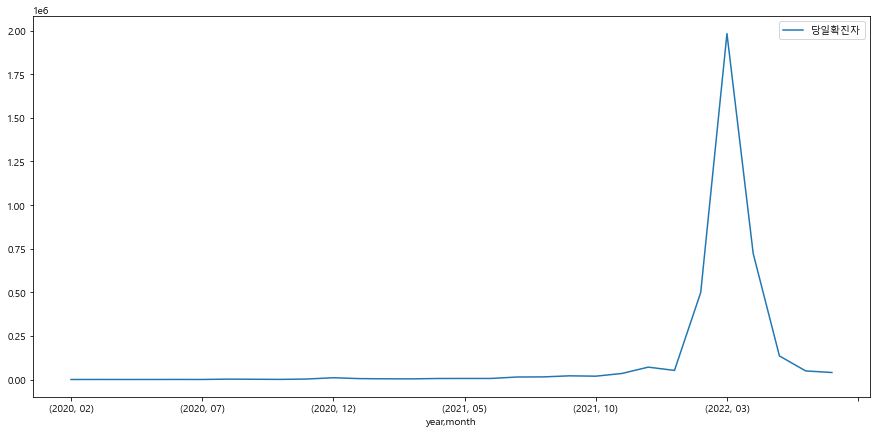

In [25]:
covid_group.plot(figsize=(15,7))

#### 데이터 전처리[국내유가(휘발유) 파일]

In [26]:
# 국내(서울) 유가 CSV FILE => DataFrame 변환
oilDF=pd.read_csv(DIR+'gasoline_seoul_19.06.01_22.07.10.csv', encoding='cp949')

# 컬럼명 변경
oilDF.rename(columns={'구분':'date'},inplace=True)

# 날짜 연-월-일 분리
oilDF['year']=oilDF['date'].str[:4]
oilDF['month']=oilDF['date'].str[5:7]
oilDF['day']=oilDF['date'].str[8:10]

# data 형식 변경
oilDF['date']=oilDF['date'].str.replace('년','-')
oilDF['date']=oilDF['date'].str.replace('월','-')
oilDF['date']=oilDF['date'].str.replace('일','')

In [27]:
# 결측값 여부 확인
oilDF.isnull().sum()

date     0
보통휘발유    0
year     0
month    0
day      0
dtype: int64

In [28]:
# 중복 데이터 여부 확인
oilDF.duplicated().sum()

0

### (1-3) 국내유가(휘발유)에 대한 기본통계

In [29]:
# 월별 평균 국내유가
oil_group=pd.DataFrame(oilDF.groupby(['year','month']).mean())
oil_group

보통휘발유
year month             
2019 06     1517.543333
     07     1491.493226
     08     1493.717097
     09     1529.259333
     10     1540.464194
     11     1535.648333
     12     1548.470323
2020 01     1568.443226
     02     1545.291034
     03     1469.085484
     04     1323.690333
     05     1255.106774
     06     1322.896000
     07     1360.252903
     08     1361.099032
     09     1352.501667
     10     1333.295806
     11     1319.595000
     12     1367.801290
2021 01     1441.843871
     02     1463.226786
     03     1513.270645
     04     1534.524333
     05     1541.530968
     06     1577.390000
     07     1629.365484
     08     1645.809355
     09     1642.742333
     10     1712.418387
     11     1737.456000
     12     1646.383871
2022 01     1635.221613
     02     1714.555714
     03     1938.549032
     04     1976.537667
     05     1967.067097
     06     2084.009333
     07     2113.339000

In [30]:
c=oil_group['보통휘발유']

print(f'국내유가 월평균 => {round(c.mean())}원')
print(f'국내유가 최대월 => {c.idxmax()}, {round(c.max())}원')
print(f'국내유가 최소월 => {c.idxmin()}, {round(c.min())}원')

국내유가 월평균 => 1572원
국내유가 최대월 => ('2022', '07'), 2113원
국내유가 최소월 => ('2020', '05'), 1255원


<AxesSubplot:xlabel='year,month'>

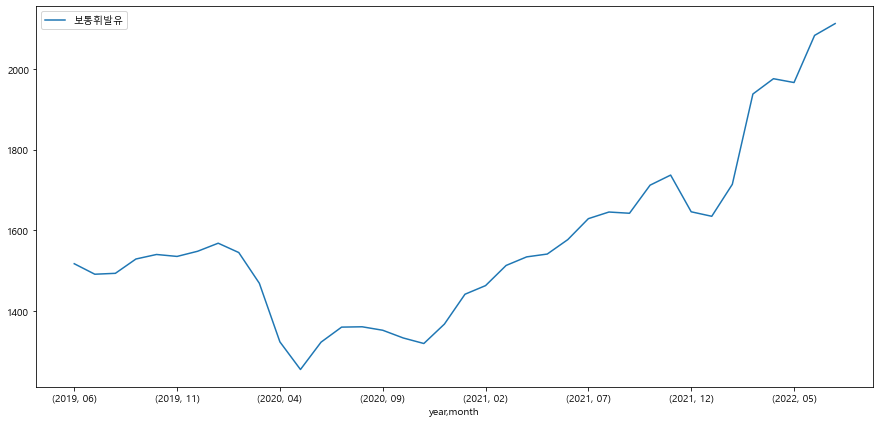

In [31]:
oil_group.plot(figsize=(15,7))

### (2-1) 공공자전거 이용자와 코로나 확진자와의 관계성

In [32]:
# 비교하기 위해 같은 기간으로 데이터 추출
bike2021=bike_group.loc['2021'][2:10]
covid2021=covid_group.loc['2021'][2:10]

# DF 합치기
bk_cvd = bike2021.join(covid2021)

# 데이터 정규화
bk_cvd_normal = (bk_cvd - bk_cvd.mean())/bk_cvd.std()

In [33]:
# 공공자전거 이용자와 코로나 확진자의 상관관계
bk_cvd_corr=bk_cvd.corr()
print(f'공공자전거 이용자와 코로나 확진자의 상관계수 => {bk_cvd_corr.iloc[0][1]}')

공공자전거 이용자와 코로나 확진자의 상관계수 => 0.7286140081839408


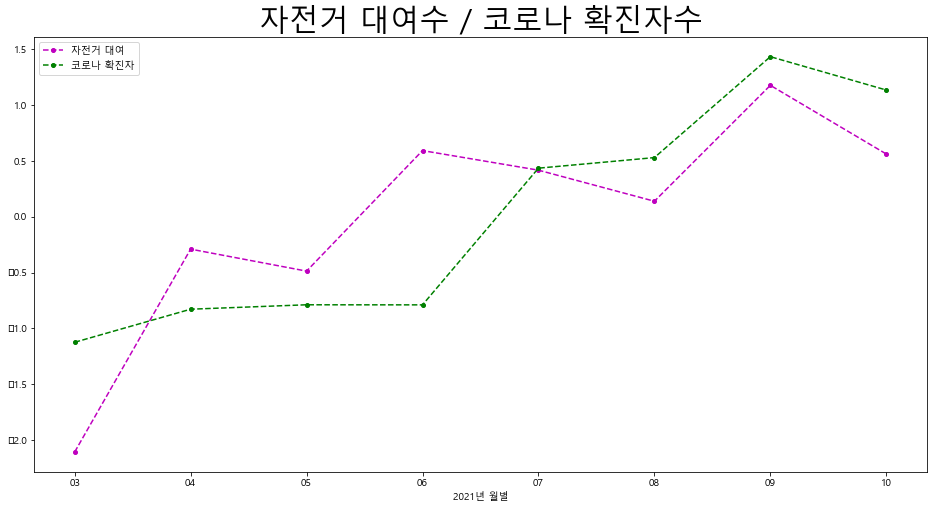

In [34]:
# 그래프에 사용하기 위해 dataframe에서 list 추출
bike_list = bk_cvd_normal['자전거대여'].to_list()
covid_list = bk_cvd_normal['당일확진자'].to_list()

month = pd.date_range(start='2021-03', end='2021-11', freq='M').strftime('%m').to_list()

# 그래프로 시각화
plt.figure(figsize=(16,8))
plt.plot(month, bike_list, 'mo--', label='자전거 대여', ms = 4)
plt.legend()    # 범례
plt.plot(month, covid_list, 'go--', label='코로나 확진자', ms = 4)
plt.legend()  
plt.xlabel('2021년 월별')    # x축 라벨
plt.title('자전거 대여수 / 코로나 확진자수', fontdict={'fontsize': 30})
plt.xticks(month)

plt.show()

### 중간 결론
- 공공자전거 이용자와 코로나 확진자와의 관계성을 비교하기 위해 같은 기간으로 데이터를 추출하고, 데이터 정규화를 하였습니다.  
  델타 변이로 인해 제4차 대유행(6월~12월)이 있었던 2021년에는 코로나 확진자가 증가함을 그래프에서 확인할 수 있고,     
  공공자전거 이용자도 같은 기간동안 증가하는 추세임을 확인할 수 있습니다. 또한 상관계수도 0.73으로 양의 상관관계가 있었습니다.   
  코로나로 인해 여러사람이 함께 이용하는 대중교통을 꺼려 공공자전거 이용자가 늘어났다고 볼 수 있으며,     
  다른 1인 모빌리티 이용자도 늘어날 수 있음 예상할 수 있습니다.

### (2-2) 공공자전거 이용자와 국내유가의 관계성

In [35]:
# 비교하기 위해 같은 기간으로 데이터 추출
bike2021=bike_group.loc['2021'][2:10]
oil2021=oil_group.loc['2021'][2:10]

# DF 합치기
bk_oil = bike2021.join(oil2021)

# 데이터 정규화
bk_oil_normal = (bk_oil - bk_oil.mean())/bk_oil.std()

In [36]:
# 공공자전거 이용자와 국내유가의 상관관계
bk_oil_corr=bk_oil.corr()
print(f'공공자전거 이용자와 국내유가의 상관계수 => {bk_oil_corr.iloc[0][1]}')

공공자전거 이용자와 국내유가의 상관계수 => 0.7237938411977733


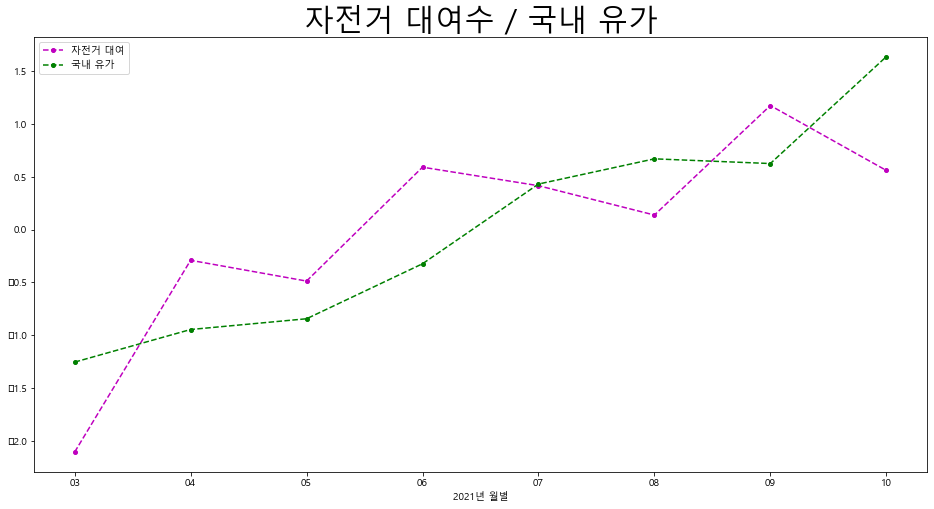

In [41]:
# 그래프에 사용하기 위해 dataframe에서 list 추출
bike_list = bk_oil_normal['자전거대여'].to_list()
oil_list = bk_oil_normal['보통휘발유'].to_list()

month = pd.date_range(start='2021-03', end='2021-11', freq='M').strftime('%m').to_list()

# 그래프로 시각화
plt.figure(figsize=(16,8))
plt.plot(month, bike_list, 'mo--', label='자전거 대여', ms = 4)
plt.legend()    # 범례
plt.plot(month, oil_list, 'go--', label='국내 유가', ms = 4)
plt.legend()  
plt.xlabel('2021년 월별')    # x축 라벨
plt.title('자전거 대여수 / 국내 유가', fontdict={'fontsize': 30})
plt.xticks(month)

plt.show()

### 중간 결론
- 공공자전거 이용자와 국내 유가와의 관계성을 비교하기 위해 같은 기간으로 데이터를 추출하고, 데이터 정규화를 하였습니다.   
  천연가스 가격 상승, 유럽의 탄소중립 정책, 미국의 원유재고 감소, 러시아의 공급물량 감소 등으로   
  국내유가인 휘발유의 가격이 증가함을 그래프에서 확인할 수 있고, 공공자전거 이용자도 같은 기간 증가하는 추세입니다.   
  또한 상관계수도 0.72로 양의 상관관계가 있었습니다.  
  유가 상승으로 인해 자가용 이용자가 공공자전거를 이용하였다고 볼 수 있으며, 다른 1인 모빌리티도 이용할 수 있음 예상할 수 있습니다.